# EDA and Data Wrangling CSVs Analysts

We are going to do de EDA of all the csvs one by one and see if we have to chanche something or not

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### coach_table

In [6]:
df_coach = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\coach_table.csv')

In [7]:
display(df_coach)

,coach_id,name,birthdate,nationality,role
0,1,Allison Hill,1966-12-28,Burundi,Head Coach
1,2,Megan Mcclain,1962-05-10,Nauru,Head Coach
2,3,Allen Robinson,1976-08-04,Netherlands,Head Coach
3,4,Cristian Santos,1977-12-09,Italy,Head Coach
4,5,Kevin Pacheco,1959-08-14,Senegal,Head Coach
5,6,Melissa Peterson,1964-09-08,Cuba,Head Coach
6,7,Gabrielle Davis,1962-09-08,Guinea-Bissau,Head Coach
7,8,Lindsey Roman,1984-03-23,Kuwait,Head Coach
8,9,Valerie Gray,1978-03-07,French Polynesia,Head Coach
9,10,Lisa Hensley,1979-01-16,Congo,Head Coach


In [8]:
if 'index' in df_coach.columns:
    df_coach.drop(columns='index', inplace=True)

We drop the index because we have id

In [9]:
print(df_coach.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   coach_id     20 non-null     int64 
 1   name         20 non-null     object
 2   birthdate    20 non-null     object
 3   nationality  20 non-null     object
 4   role         20 non-null     object
dtypes: int64(1), object(4)
memory usage: 932.0+ bytes
None


We can see that the birthdate is type object and we want to put it in type date, so lets do it.

In [10]:
df_coach['birthdate'] = pd.to_datetime(df_coach['birthdate'], errors='coerce')


In [11]:
# Verificar el tipo de dato
print(df_coach.dtypes)

coach_id                int64
name                   object
birthdate      datetime64[ns]
nationality            object
role                   object
dtype: object


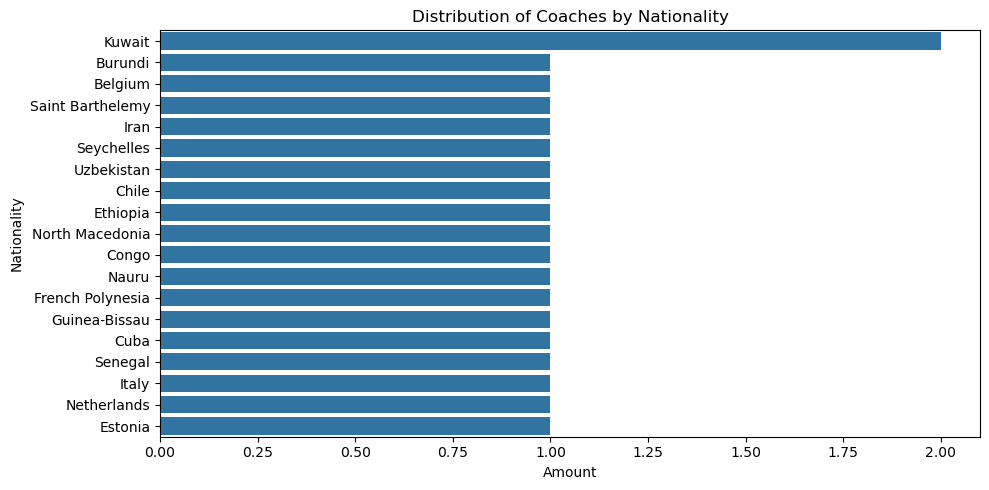

In [12]:
# Distribución por nacionalidad
plt.figure(figsize=(10,5))
sns.countplot(data=df_coach, y='nationality', order=df_coach['nationality'].value_counts().index)
plt.title('Distribution of Coaches by Nationality')
plt.xlabel('Amount')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()

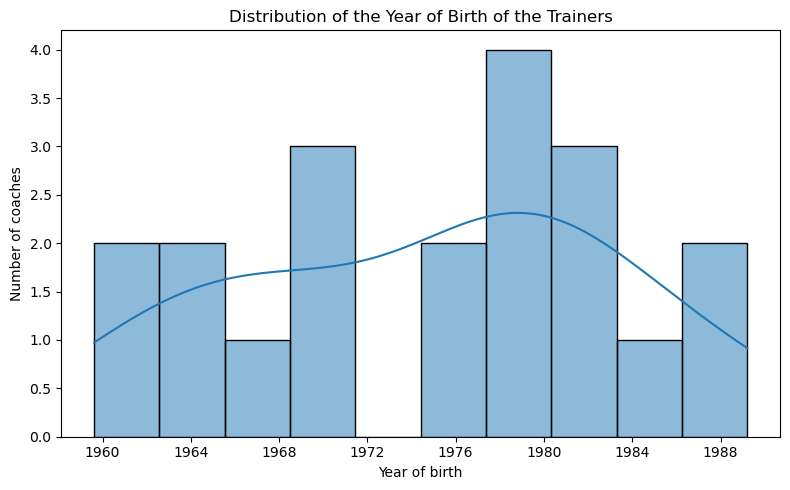

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df_coach['birthdate'], bins=10, kde=True)
plt.title('Distribution of the Year of Birth of the Trainers')
plt.xlabel('Year of birth')
plt.ylabel('Number of coaches')
plt.tight_layout()
plt.show()

As we can see, we can't do to much for this dataframe because there aren't any null data.

So we are going to export it with the changes

In [14]:
#vamos aexportar el dataframe a un archivo csv
df_coach.to_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\df_coach_cleaned.csv', index=False)



### fan_table

In [19]:
df_fan = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\fan_table.csv')

In [20]:
display(df_fan)

,fan_id,loyalty_points
0,1,654
1,2,114
2,3,25
3,4,759
4,5,281
5,6,250
6,7,228
7,8,142
8,9,754
9,10,104


In [21]:
print(df_fan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   fan_id          50 non-null     int64
 1   loyalty_points  50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None


Good data types

In [22]:
if 'index' in df_fan.columns:
    df_fan.drop(columns='index', inplace=True)

We drop the index because we have id

In [23]:
print(df_fan.describe())

         fan_id  loyalty_points
count  50.00000       50.000000
mean   25.50000      439.860000
std    14.57738      287.728614
min     1.00000        6.000000
25%    13.25000      207.250000
50%    25.50000      432.000000
75%    37.75000      708.500000
max    50.00000      980.000000


In [24]:
print(df_fan.isnull().sum())

fan_id            0
loyalty_points    0
dtype: int64


no nulls

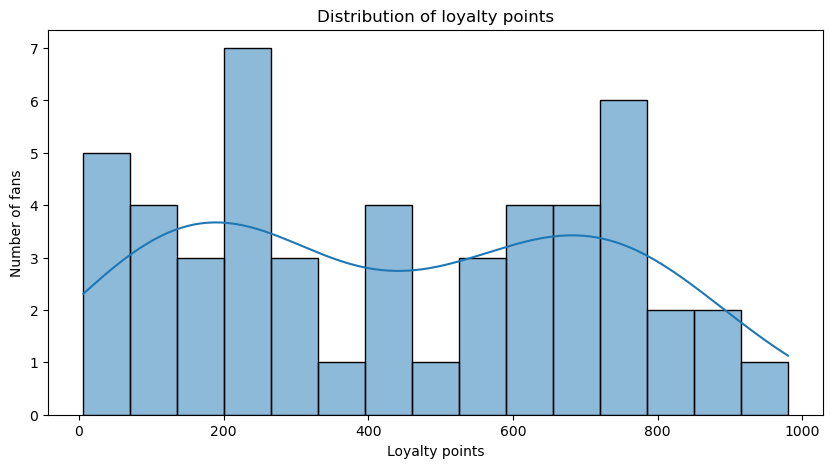

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df_fan['loyalty_points'], bins=15, kde=True)
plt.title('Distribution of loyalty points')
plt.xlabel('Loyalty points')
plt.ylabel('Number of fans')
plt.show()


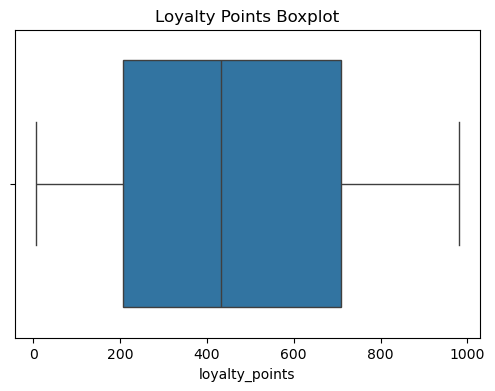

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_fan['loyalty_points'])
plt.title('Loyalty Points Boxplot')
plt.show()

In [27]:
df_fan.to_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\df_fan_cleaned.csv', index=False)


### formation_table

In [28]:
df_formation = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\formation_table.csv')

In [29]:
display(df_formation)

,formation_id,coach_id,type
0,1,1,3-4-3
1,2,1,4-4-2
2,3,2,4-4-2
3,4,2,3-4-3
4,5,3,3-5-2
5,6,3,4-3-3
6,7,4,4-3-3
7,8,4,4-3-3
8,9,5,3-4-3
9,10,5,4-4-2


In [30]:
if 'index' in df_formation.columns:
    df_formation.drop(columns='index', inplace=True)

In order not to always repeat the same thing, we are going to eliminate the index of all of them since they all have ids to be able to be related.

In [31]:
print(df_formation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   formation_id  40 non-null     int64 
 1   coach_id      40 non-null     int64 
 2   type          40 non-null     object
dtypes: int64(2), object(1)
memory usage: 1.1+ KB
None


good type data

In [32]:
print(df_formation.isnull().sum())

formation_id    0
coach_id        0
type            0
dtype: int64


no nulls

In [33]:
# more repeated formations
print(df_formation['type'].value_counts())

type
3-4-3      9
4-4-2      9
4-3-3      8
4-2-3-1    7
5-3-2      4
3-5-2      3
Name: count, dtype: int64


the most repeated is 3-4-3

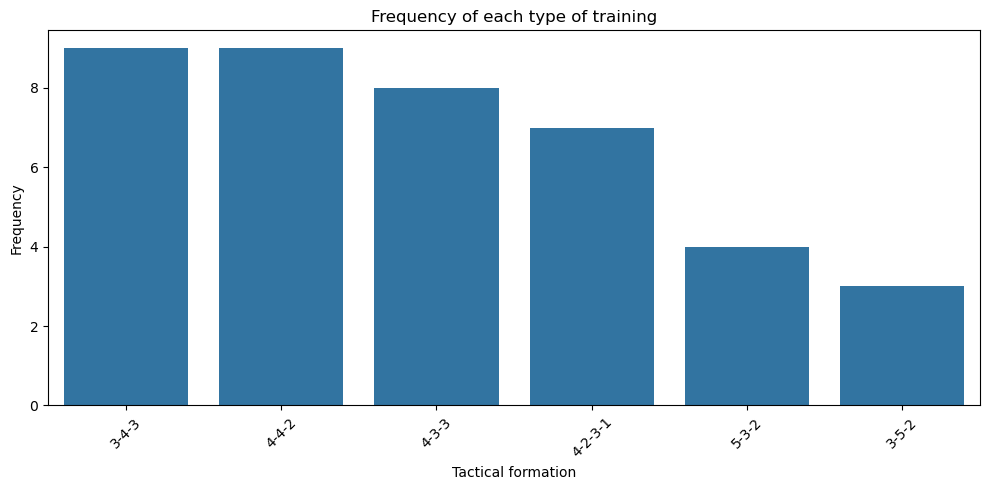

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=df_formation, order=df_formation['type'].value_counts().index)
plt.title('Frequency of each type of training')
plt.xlabel('Tactical formation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df_formation.to_csv('df_formation_limpio.csv', index=False)

### match_table

In [36]:
df_match = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\match_table.csv')

In [37]:
display(df_match)

,match_id,stadium_id,stadium_name,home_team_id,away_team_id,home_team_name,away_team_name,match_date,result,total_time
0,1,1,Spotify Camp Nou,1,2,Real Madrid,Atlético de Madrid,2023-09-27,Home Win,94
1,2,2,Santiago Bernabéu,2,1,Atlético de Madrid,Real Madrid,2023-12-04,Home Win,92
2,3,1,Spotify Camp Nou,1,3,Real Madrid,Real Betis,2023-09-22,Draw,96
3,4,3,Wanda Metropolitano,3,1,Real Betis,Real Madrid,2023-09-14,Draw,95
4,5,1,Spotify Camp Nou,1,4,Real Madrid,FC Barcelona,2023-08-17,Home Win,90
...,...,...,...,...,...,...,...,...,...,...
375,376,19,Carlos Tartiere,19,18,Girona FC,Rayo Vallecano,2024-02-12,Draw,92
376,377,18,Ciutat de València,18,20,Rayo Vallecano,CD Leganés,2024-04-11,Draw,92
377,378,20,La Rosaleda,20,18,CD Leganés,Rayo Vallecano,2023-11-27,Away Win,94
378,379,19,Carlos Tartiere,19,20,Girona FC,CD Leganés,2024-03-23,Away Win,90


In [38]:
if 'index' in df_match.columns:
    df_formation.drop(columns='index', inplace=True)

In [39]:
print(df_match.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_id        380 non-null    int64 
 1   stadium_id      380 non-null    int64 
 2   stadium_name    380 non-null    object
 3   home_team_id    380 non-null    int64 
 4   away_team_id    380 non-null    int64 
 5   home_team_name  380 non-null    object
 6   away_team_name  380 non-null    object
 7   match_date      380 non-null    object
 8   result          380 non-null    object
 9   total_time      380 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 29.8+ KB
None


It's a good idea to convert match_date to datetime64 for time analysis.
By having few unique values, category reduces memory usage and allows for more efficient analysis in result column

In [40]:
df_match['match_date'] = pd.to_datetime(df_match['match_date'])
df_match['result'] = df_match['result'].astype('category')

In [41]:
print(df_match['result'].value_counts())
print(df_match['home_team_name'].nunique(), "equipos locales únicos")
print(df_match['away_team_name'].nunique(), "equipos visitantes únicos")

result
Away Win    132
Home Win    126
Draw        122
Name: count, dtype: int64
20 equipos locales únicos
20 equipos visitantes únicos


In [42]:
print(df_match.isnull().sum())

match_id          0
stadium_id        0
stadium_name      0
home_team_id      0
away_team_id      0
home_team_name    0
away_team_name    0
match_date        0
result            0
total_time        0
dtype: int64


no nulls

In [43]:
# to know if there are duplicated matches
duplicados_match_id = df_match[df_match.duplicated(subset='match_id')]
print(duplicados_match_id)


Empty DataFrame
Columns: [match_id, stadium_id, stadium_name, home_team_id, away_team_id, home_team_name, away_team_name, match_date, result, total_time]
Index: []


In [44]:
# to know if there are matches where the team plays against him
auto_partidos = df_match[df_match['home_team_id'] == df_match['away_team_id']]
print(auto_partidos)


Empty DataFrame
Columns: [match_id, stadium_id, stadium_name, home_team_id, away_team_id, home_team_name, away_team_name, match_date, result, total_time]
Index: []


In [45]:
home_counts = df_match['home_team_name'].value_counts().rename("home_matches")
away_counts = df_match['away_team_name'].value_counts().rename("away_matches")
team_match_counts = pd.concat([home_counts, away_counts], axis=1).fillna(0)
team_match_counts["total_matches"] = team_match_counts["home_matches"] + team_match_counts["away_matches"]
print(team_match_counts.sort_values("total_matches", ascending=False))


                    home_matches  away_matches  total_matches
Real Madrid                   19            19             38
Atlético de Madrid            19            19             38
Real Betis                    19            19             38
FC Barcelona                  19            19             38
Athletic Club                 19            19             38
Valencia CF                   19            19             38
Sevilla FC                    19            19             38
RCD Espanyol                  19            19             38
Real Sociedad                 19            19             38
UD Las Palmas                 19            19             38
Real Valladolid               19            19             38
RCD Mallorca                  19            19             38
Celta de Vigo                 19            19             38
CA Osasuna                    19            19             38
Villarreal CF                 19            19             38
Deportiv

C:\Users\luisb\AppData\Local\Temp\ipykernel_1276\187009909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_match, x='result', order=df_match['result'].value_counts().index, palette='Set2')


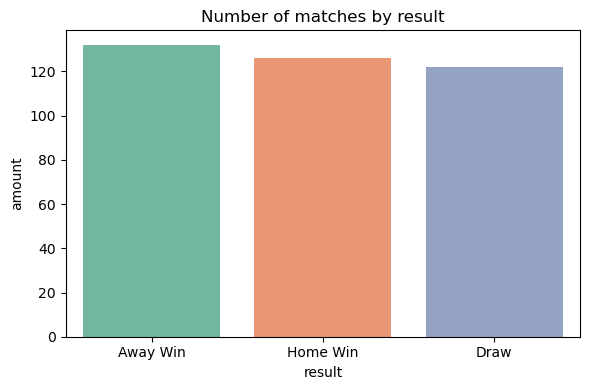

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_match, x='result', order=df_match['result'].value_counts().index, palette='Set2')
plt.title('Number of matches by result')
plt.xlabel('result')
plt.ylabel('amount')
plt.tight_layout()
plt.show()


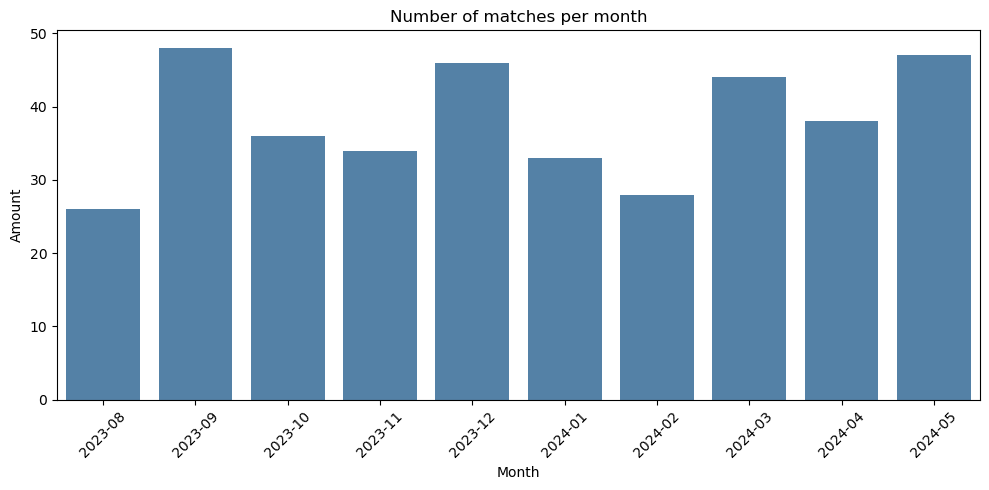

In [47]:
df_match['match_date'] = pd.to_datetime(df_match['match_date'])
df_match['month'] = df_match['match_date'].dt.to_period('M').astype(str)

plt.figure(figsize=(10,5))
sns.countplot(data=df_match, x='month', order=sorted(df_match['month'].unique()), color='steelblue')
plt.xticks(rotation=45)
plt.title('Number of matches per month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()


C:\Users\luisb\AppData\Local\Temp\ipykernel_1276\776761804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stadiums.values, y=top_stadiums.index, palette='viridis')


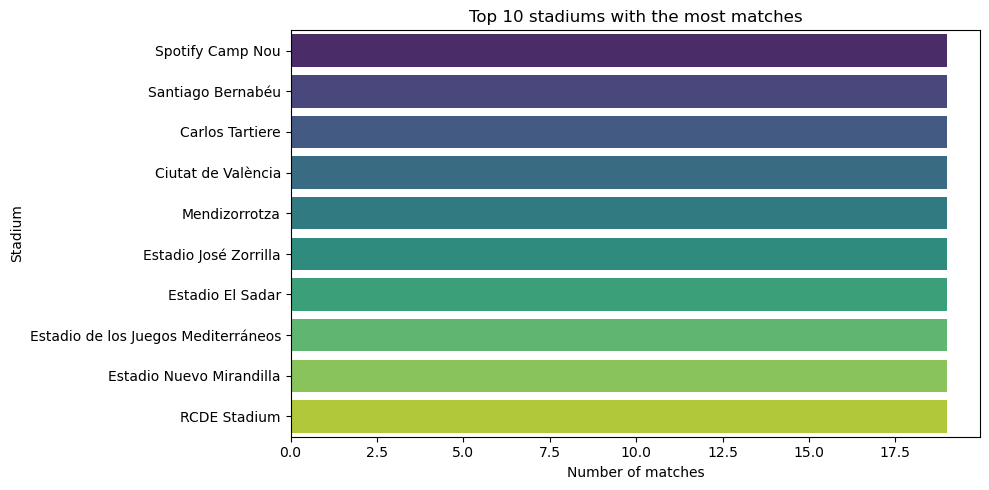

In [48]:
top_stadiums = df_match['stadium_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_stadiums.values, y=top_stadiums.index, palette='viridis')
plt.title('Top 10 stadiums with the most matches')
plt.xlabel('Number of matches')
plt.ylabel('Stadium')
plt.tight_layout()
plt.show()


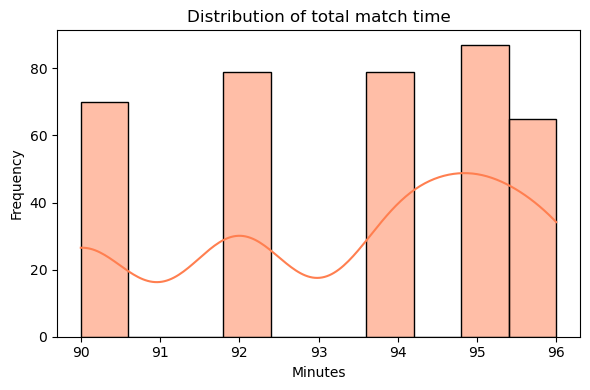

In [49]:
plt.figure(figsize=(6,4))
sns.histplot(df_match['total_time'], bins=10, kde=True, color='coral')
plt.title('Distribution of total match time')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [50]:
df_match.to_csv('df_match_cleaned.csv', index=False)

### Player Stats

In [51]:
df_player_stats = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\player_stats_table.csv')


In [52]:
display(df_player_stats)


,stat_id,match_id,player_id,goals,assists,yellow_cards,red_cards,minutes_played,distance_covered_in_meters,sprints,pass_completion_rate,injury_occurred,rest_days_since_last_match,is_back_to_back_away_game
0,1,328,15,1,2,0,0,84,2520,6,65,0,0,1
1,2,112,30,3,0,1,0,50,8924,26,77,0,8,0
2,3,80,28,3,0,1,0,35,9527,39,67,0,12,1
3,4,194,11,2,2,0,0,59,6741,10,74,0,8,1
4,5,52,49,2,0,1,0,39,11980,15,94,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,2,44,2,2,0,0,93,4301,31,66,0,5,1
296,297,131,79,3,0,1,0,73,3765,31,62,0,3,0
297,298,325,87,3,1,0,0,36,11064,32,97,0,9,0
298,299,248,66,1,2,0,0,94,8302,31,98,0,12,0


In [53]:
if 'index' in df_player_stats.columns:
    df_player_stats.drop(columns='index', inplace=True)


In [54]:
print(df_player_stats.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   stat_id                     300 non-null    int64
 1   match_id                    300 non-null    int64
 2   player_id                   300 non-null    int64
 3   goals                       300 non-null    int64
 4   assists                     300 non-null    int64
 5   yellow_cards                300 non-null    int64
 6   red_cards                   300 non-null    int64
 7   minutes_played              300 non-null    int64
 8   distance_covered_in_meters  300 non-null    int64
 9   sprints                     300 non-null    int64
 10  pass_completion_rate        300 non-null    int64
 11  injury_occurred             300 non-null    int64
 12  rest_days_since_last_match  300 non-null    int64
 13  is_back_to_back_away_game   300 non-null    int64
dtypes: int64(1

In [55]:
print(df_player_stats.isnull().sum())


stat_id                       0
match_id                      0
player_id                     0
goals                         0
assists                       0
yellow_cards                  0
red_cards                     0
minutes_played                0
distance_covered_in_meters    0
sprints                       0
pass_completion_rate          0
injury_occurred               0
rest_days_since_last_match    0
is_back_to_back_away_game     0
dtype: int64


In [56]:
print(df_player_stats.describe())


          stat_id    match_id   player_id       goals     assists  \
count  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   150.500000  195.590000   48.740000    1.593333    0.960000   
std     86.746758  107.139776   29.616146    1.076329    0.816879   
min      1.000000    2.000000    1.000000    0.000000    0.000000   
25%     75.750000  107.500000   21.750000    1.000000    0.000000   
50%    150.500000  202.000000   49.000000    2.000000    1.000000   
75%    225.250000  286.000000   75.000000    3.000000    2.000000   
max    300.000000  380.000000  100.000000    3.000000    2.000000   

       yellow_cards   red_cards  minutes_played  distance_covered_in_meters  \
count    300.000000  300.000000      300.000000                  300.000000   
mean       0.470000    0.030000       62.523333                 6969.320000   
std        0.499933    0.170872       18.364102                 2997.072963   
min        0.000000    0.000000       30.000000               

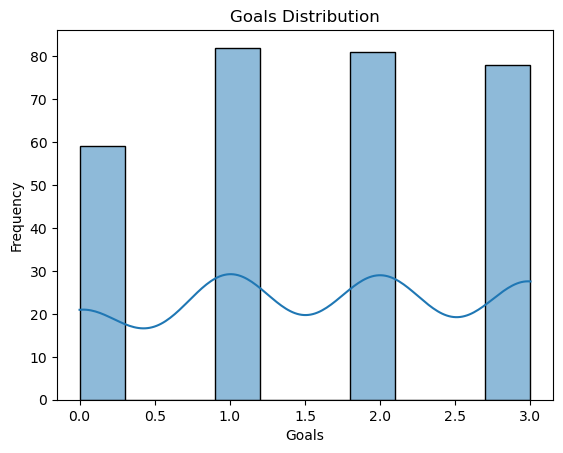

In [57]:
if 'goals' in df_player_stats.columns:
    sns.histplot(df_player_stats['goals'], kde=True)
    plt.title('Goals Distribution')
    plt.xlabel('Goals')
    plt.ylabel('Frequency')
    plt.show()


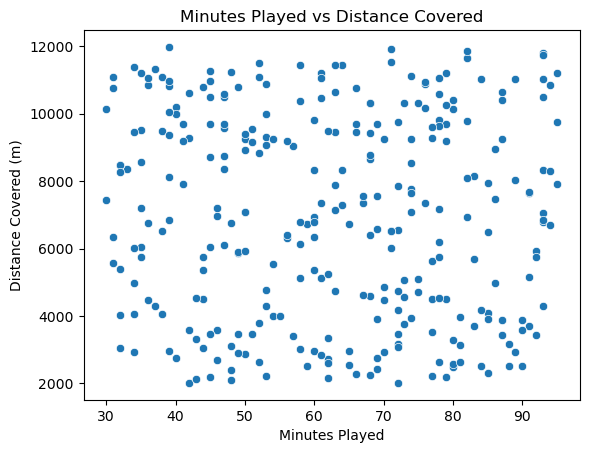

In [58]:
sns.scatterplot(data=df_player_stats, x='minutes_played', y='distance_covered_in_meters')
plt.title('Minutes Played vs Distance Covered')
plt.xlabel('Minutes Played')
plt.ylabel('Distance Covered (m)')
plt.show()


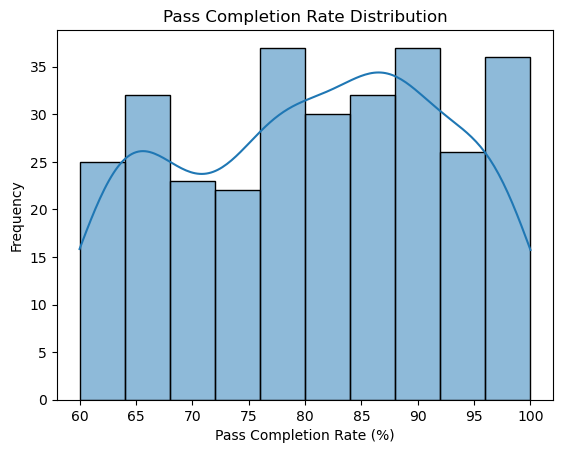

In [59]:
sns.histplot(df_player_stats['pass_completion_rate'], bins=10, kde=True)
plt.title('Pass Completion Rate Distribution')
plt.xlabel('Pass Completion Rate (%)')
plt.ylabel('Frequency')
plt.show()


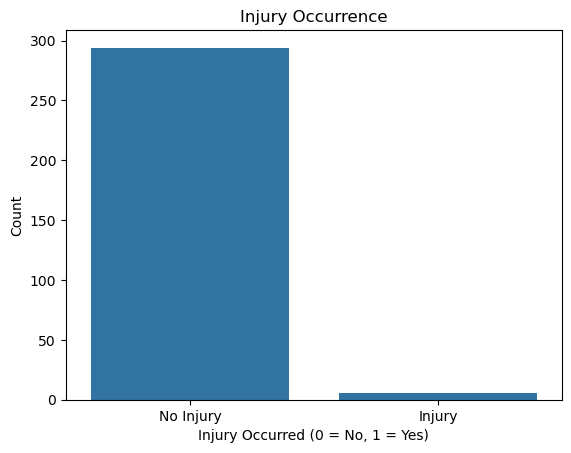

In [60]:
sns.countplot(data=df_player_stats, x='injury_occurred')
plt.title('Injury Occurrence')
plt.xlabel('Injury Occurred (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Injury', 'Injury'])
plt.show()


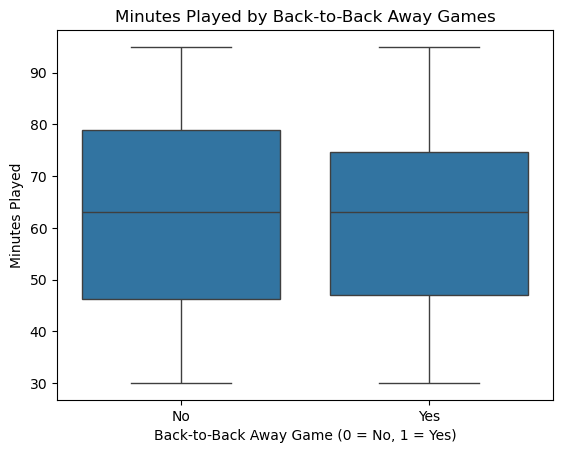

In [61]:
sns.boxplot(data=df_player_stats, x='is_back_to_back_away_game', y='minutes_played')
plt.title('Minutes Played by Back-to-Back Away Games')
plt.xlabel('Back-to-Back Away Game (0 = No, 1 = Yes)')
plt.ylabel('Minutes Played')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
df_player_stats.to_csv('df_player_stats_cleaned.csv', index=False)

### Player Table

In [74]:
df_player = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\player_table.csv')


In [75]:
display(df_player.head())


,player_id,name,birthdate,nationality,position,market_value,current_team_id,instagram_followers,engagement_rate,media_mentions
0,1,Allison Hill,1991-12-29,Burundi,Defender,91400476.29,9,9516702,8.83,2587
1,2,Megan Mcclain,1987-05-11,Nauru,Defender,65888427.86,9,6638601,8.90,3768
2,3,Allen Robinson,2001-08-05,Netherlands,Defender,27223136.48,19,4138722,7.58,4425
3,4,Cristian Santos,2002-12-10,Italy,Midfielder,74954367.35,2,7188926,9.03,3281
4,5,Kevin Pacheco,1984-08-14,Senegal,Midfielder,22712755.16,14,2321821,5.34,754


In [76]:
if 'index' in df_player.columns:
    df_player.drop(columns='index', inplace=True)


In [77]:
print(df_player.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            100 non-null    int64  
 1   name                 100 non-null    object 
 2   birthdate            100 non-null    object 
 3   nationality          100 non-null    object 
 4   position             100 non-null    object 
 5   market_value         100 non-null    float64
 6   current_team_id      100 non-null    int64  
 7   instagram_followers  100 non-null    int64  
 8   engagement_rate      100 non-null    float64
 9   media_mentions       100 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB
None


Birthdate is as object and must be converted to type datetime

In [78]:
if 'birthdate' in df_player.columns:
    df_player['birthdate'] = pd.to_datetime(df_player['birthdate'], errors='coerce')


In [79]:
print(df_player.isnull().sum())


player_id              0
name                   0
birthdate              0
nationality            0
position               0
market_value           0
current_team_id        0
instagram_followers    0
engagement_rate        0
media_mentions         0
dtype: int64


In [80]:
print(df_player.describe(include='all'))


         player_id          name            birthdate nationality  position  \
count   100.000000           100                  100         100       100   
unique         NaN           100                  NaN          86         4   
top            NaN  Allison Hill                  NaN  Mozambique  Defender   
freq           NaN             1                  NaN           3        33   
mean     50.500000           NaN  1995-02-23 00:14:24         NaN       NaN   
min       1.000000           NaN  1984-06-02 00:00:00         NaN       NaN   
25%      25.750000           NaN  1989-09-06 00:00:00         NaN       NaN   
50%      50.500000           NaN  1994-09-05 00:00:00         NaN       NaN   
75%      75.250000           NaN  2000-02-16 00:00:00         NaN       NaN   
max     100.000000           NaN  2007-05-17 00:00:00         NaN       NaN   
std      29.011492           NaN                  NaN         NaN       NaN   

        market_value  current_team_id  instagram_fo


86 nationalities = high diversity.

4 different positions (Defender is the most frequent, 33 times).

Approximate age between 16-40 years old.

In [81]:
# We Calculate player age
current_year = pd.Timestamp.now().year
df_player['age'] = current_year - df_player['birthdate'].dt.year


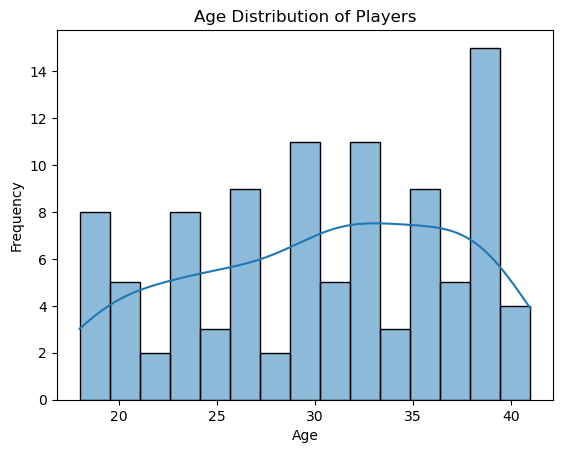

In [82]:
sns.histplot(df_player['age'].dropna(), bins=15, kde=True)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


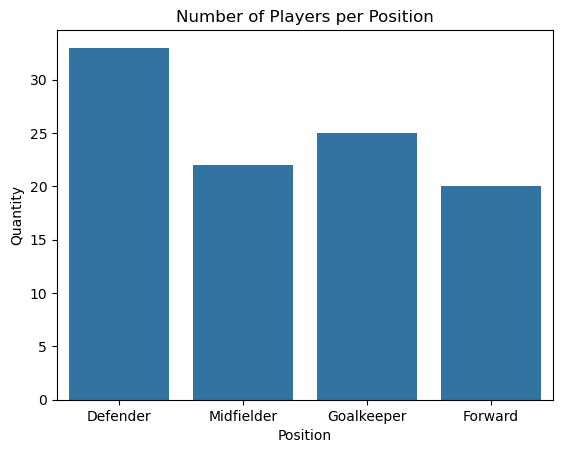

In [83]:
sns.countplot(x='position', data=df_player)
plt.title('Number of Players per Position')
plt.xlabel('Position')
plt.ylabel('Quantity')
plt.show()


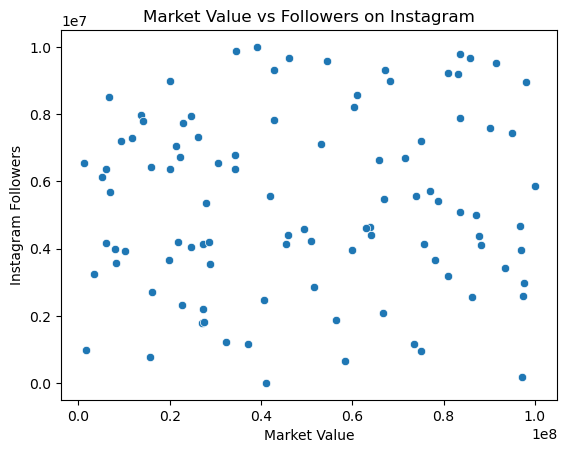

In [84]:
sns.scatterplot(x='market_value', y='instagram_followers', data=df_player)
plt.title('Market Value vs Followers on Instagram')
plt.xlabel('Market Value')
plt.ylabel('Instagram Followers')
plt.show()


In [85]:
df_player.to_csv('df_player_cleaned.csv', index=False)

### Stadium Table

In [86]:
df_stadium = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\stadium_table.csv')


In [87]:
display(df_stadium.head())


,stadium_id,name,location,capacity
0,1,Spotify Camp Nou,Barcelona,99354
1,2,Santiago Bernabéu,Madrid,81044
2,3,Wanda Metropolitano,Madrid,68456
3,4,Benito Villamarín,Sevilla,60721
4,5,San Mamés,Bilbao,53289


In [88]:
if 'index' in df_stadium.columns:
    df_stadium.drop(columns='index', inplace=True)


In [89]:
print(df_stadium.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stadium_id  20 non-null     int64 
 1   name        20 non-null     object
 2   location    20 non-null     object
 3   capacity    20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes
None



20 unique stadiums (name).

17 different locations; Madrid appears 3 times.

Capacities range from 14,708 to 99,354.

In [90]:
print(df_stadium.isnull().sum())


stadium_id    0
name          0
location      0
capacity      0
dtype: int64


In [91]:
print(df_stadium.describe(include='all'))


        stadium_id              name location      capacity
count     20.00000                20       20     20.000000
unique         NaN                20       17           NaN
top            NaN  Spotify Camp Nou   Madrid           NaN
freq           NaN                 1        3           NaN
mean      10.50000               NaN      NaN  37880.800000
std        5.91608               NaN      NaN  23524.505381
min        1.00000               NaN      NaN  14708.000000
25%        5.75000               NaN      NaN  22356.500000
50%       10.50000               NaN      NaN  28278.000000
75%       15.25000               NaN      NaN  46234.500000
max       20.00000               NaN      NaN  99354.000000


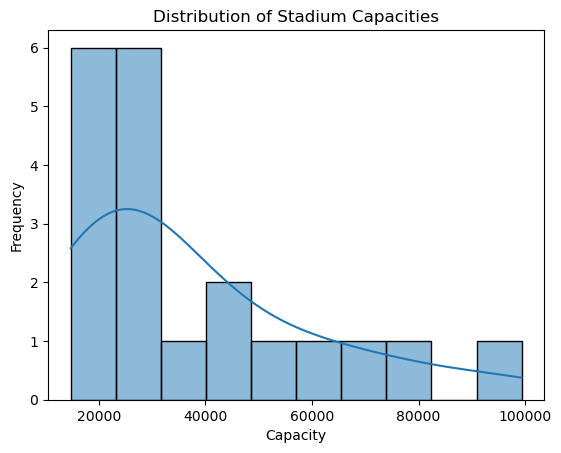

In [92]:
sns.histplot(df_stadium['capacity'], bins=10, kde=True)
plt.title('Distribution of Stadium Capacities')
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.show()



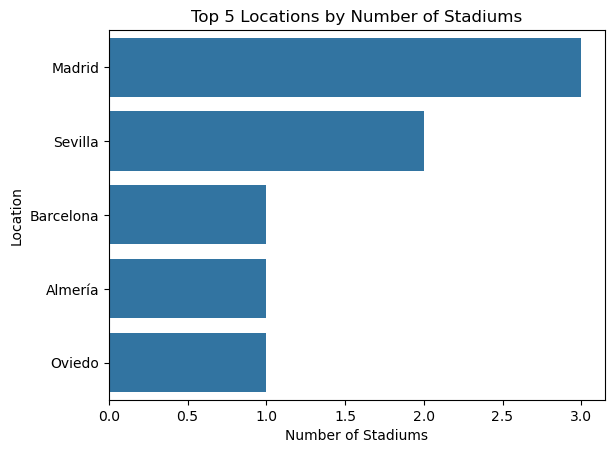

In [93]:
top_locations = df_stadium['location'].value_counts().nlargest(5)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 5 Locations by Number of Stadiums')
plt.xlabel('Number of Stadiums')
plt.ylabel('Location')
plt.show()


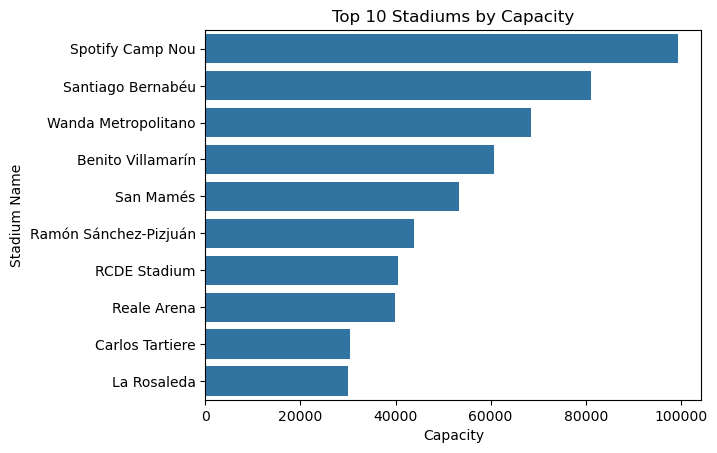

In [94]:
top_stadiums = df_stadium.sort_values('capacity', ascending=False).head(10)
sns.barplot(x='capacity', y='name', data=top_stadiums)
plt.title('Top 10 Stadiums by Capacity')
plt.xlabel('Capacity')
plt.ylabel('Stadium Name')
plt.show()


In [95]:
df_stadium.to_csv('df_stadium_cleaned.csv', index=False)

### Team table

In [96]:
df_team = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\team_table.csv')

In [97]:
display(df_team.head())

,team_id,coach_id,stadium_id,name,league
0,1,1,2,Real Madrid,LaLiga
1,2,2,3,Atlético de Madrid,LaLiga
2,3,3,4,Real Betis,LaLiga
3,4,4,5,FC Barcelona,LaLiga
4,5,5,6,Athletic Club,LaLiga


In [98]:
if 'index' in df_team.columns:
    df_team.drop(columns='index', inplace=True)


In [99]:
print(df_team.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   team_id     20 non-null     int64 
 1   coach_id    20 non-null     int64 
 2   stadium_id  20 non-null     int64 
 3   name        20 non-null     object
 4   league      20 non-null     object
dtypes: int64(3), object(2)
memory usage: 932.0+ bytes
None


In [100]:
print(df_team.isnull().sum())

team_id       0
coach_id      0
stadium_id    0
name          0
league        0
dtype: int64


In [101]:
print(df_team.describe(include='all'))

         team_id  coach_id  stadium_id         name  league
count   20.00000  20.00000    20.00000           20      20
unique       NaN       NaN         NaN           20       1
top          NaN       NaN         NaN  Real Madrid  LaLiga
freq         NaN       NaN         NaN            1      20
mean    10.50000  10.50000    10.50000          NaN     NaN
std      5.91608   5.91608     5.91608          NaN     NaN
min      1.00000   1.00000     1.00000          NaN     NaN
25%      5.75000   5.75000     5.75000          NaN     NaN
50%     10.50000  10.50000    10.50000          NaN     NaN
75%     15.25000  15.25000    15.25000          NaN     NaN
max     20.00000  20.00000    20.00000          NaN     NaN


name: 20 unique team names.

league: all teams belong to the same league (LaLiga)

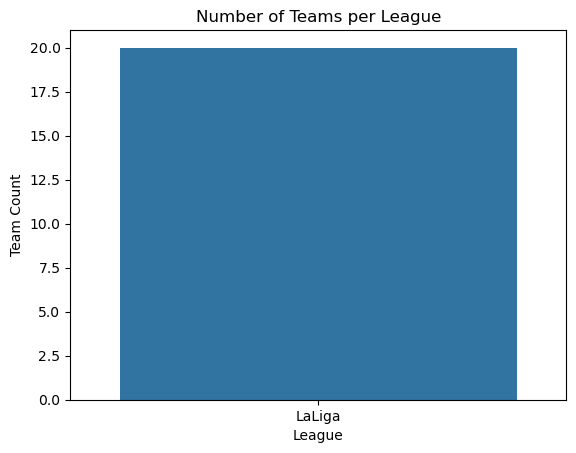

In [102]:
sns.countplot(data=df_team, x='league')
plt.title('Number of Teams per League')
plt.xlabel('League')
plt.ylabel('Team Count')
plt.show()


In [103]:
df_team.to_csv('df_team_cleaned.csv', index=False)

### Ticket Table

In [104]:
df_ticket = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\ticket_table.csv')

In [105]:
display(df_ticket.head())

,ticket_id,fan_id,match_id,seat_number,price,purchase_date
0,1,41,58,1C,44.49,2025-03-12
1,2,9,378,4A,79.05,2025-05-21
2,3,3,16,3B,43.27,2025-02-20
3,4,39,14,18B,91.60,2025-04-28
4,5,45,280,14B,64.92,2025-04-02


In [106]:
if 'index' in df_ticket.columns:
    df_ticket.drop(columns='index', inplace=True)


In [107]:
print(df_ticket.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticket_id      100 non-null    int64  
 1   fan_id         100 non-null    int64  
 2   match_id       100 non-null    int64  
 3   seat_number    100 non-null    object 
 4   price          100 non-null    float64
 5   purchase_date  100 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB
None


In [108]:
print(df_ticket.isnull().sum())

ticket_id        0
fan_id           0
match_id         0
seat_number      0
price            0
purchase_date    0
dtype: int64


In [109]:
print(df_ticket.describe(include='all'))

         ticket_id      fan_id    match_id seat_number       price  \
count   100.000000  100.000000  100.000000         100  100.000000   
unique         NaN         NaN         NaN          68         NaN   
top            NaN         NaN         NaN          3B         NaN   
freq           NaN         NaN         NaN           6         NaN   
mean     50.500000   25.400000  177.130000         NaN   75.393200   
std      29.011492   14.432707  117.050766         NaN   26.769371   
min       1.000000    1.000000    2.000000         NaN   23.830000   
25%      25.750000   14.000000   74.750000         NaN   53.357500   
50%      50.500000   26.000000  150.000000         NaN   79.470000   
75%      75.250000   37.000000  288.000000         NaN   97.542500   
max     100.000000   50.000000  378.000000         NaN  117.190000   

       purchase_date  
count            100  
unique            80  
top       2025-02-26  
freq               3  
mean             NaN  
std              NaN 

In [110]:
if 'purchase_date' in df_ticket.columns:
    df_ticket['purchase_date'] = pd.to_datetime(df_ticket['purchase_date'], errors='coerce')

100 total ticket entries.

68 unique seat numbers.

purchase_date has 80 unique values

Ticket prices range from 23.83 to 117.19

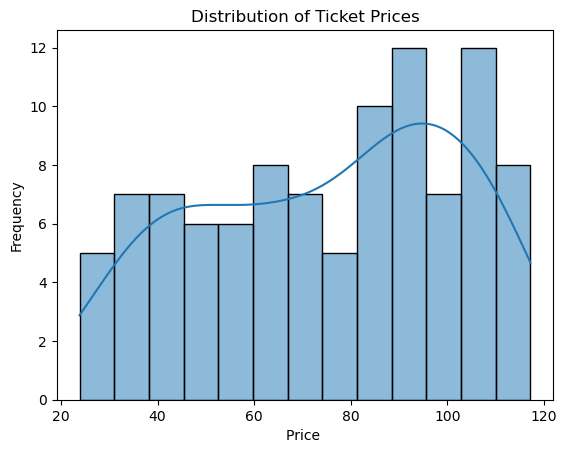

In [111]:
sns.histplot(df_ticket['price'], bins=13, kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price ')
plt.ylabel('Frequency')
plt.show()


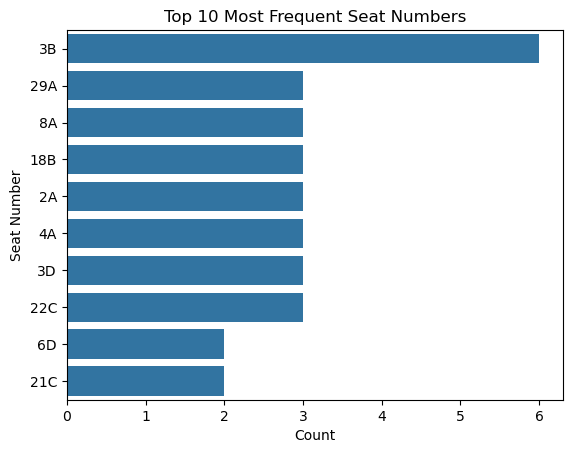

In [112]:
top_seats = df_ticket['seat_number'].value_counts().head(10)
sns.barplot(x=top_seats.values, y=top_seats.index)
plt.title('Top 10 Most Frequent Seat Numbers')
plt.xlabel('Count')
plt.ylabel('Seat Number')
plt.show()


In [113]:
df_ticket.to_csv('df_ticket_cleaned.csv', index=False)

### Weather Table

In [114]:
df_weather = pd.read_csv(r'C:\Users\luisb\OneDrive\Escritorio\proyectofutbol\Proyecto-Valencia-United\analysts-work\weather_table.csv')

In [115]:
display(df_weather.head())

,match_id,weather_id,temperature,conditions,humidity,precipitation,wind_speed_in_km_h
0,1,1,24.18,Sunny,74.49,Rain,6.70
1,2,2,27.09,Windy,74.44,Hail,2.61
2,3,3,17.66,Sunny,35.62,Rain,15.16
3,4,4,5.80,Cloudy,72.96,Hail,12.59
4,5,5,18.48,Rain,78.57,NaN,22.76


In [116]:
if 'index' in df_weather.columns:
    df_weather.drop(columns='index', inplace=True)


In [117]:
print(df_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            380 non-null    int64  
 1   weather_id          380 non-null    int64  
 2   temperature         380 non-null    float64
 3   conditions          380 non-null    object 
 4   humidity            380 non-null    float64
 5   precipitation       306 non-null    object 
 6   wind_speed_in_km_h  380 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.9+ KB
None


In [118]:
print(df_weather.isnull().sum())

match_id               0
weather_id             0
temperature            0
conditions             0
humidity               0
precipitation         74
wind_speed_in_km_h     0
dtype: int64


In [119]:
print(df_weather.describe(include='all'))

          match_id  weather_id  temperature conditions    humidity  \
count   380.000000  380.000000   380.000000        380  380.000000   
unique         NaN         NaN          NaN          6         NaN   
top            NaN         NaN          NaN       Rain         NaN   
freq           NaN         NaN          NaN         73         NaN   
mean    190.500000  190.500000    20.163132        NaN   59.528105   
std     109.840794  109.840794     8.723787        NaN   18.107961   
min       1.000000    1.000000     5.010000        NaN   30.100000   
25%      95.750000   95.750000    12.925000        NaN   43.200000   
50%     190.500000  190.500000    20.435000        NaN   59.185000   
75%     285.250000  285.250000    27.770000        NaN   75.702500   
max     380.000000  380.000000    35.000000        NaN   89.990000   

       precipitation  wind_speed_in_km_h  
count            306          380.000000  
unique             4                 NaN  
top             Snow          

In [120]:
df_weather['precipitation'].fillna('No Precipitation', inplace=True)

C:\Users\luisb\AppData\Local\Temp\ipykernel_1276\3905810177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['precipitation'].fillna('No Precipitation', inplace=True)


74 missing values in precipitation

conditions: 6 unique categories (most frequent is Rain)

precipitation: 4 unique categories, with Snow as the most common



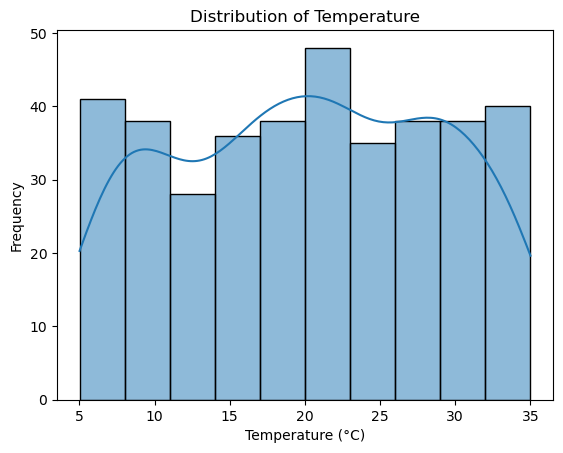

In [121]:
sns.histplot(df_weather['temperature'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


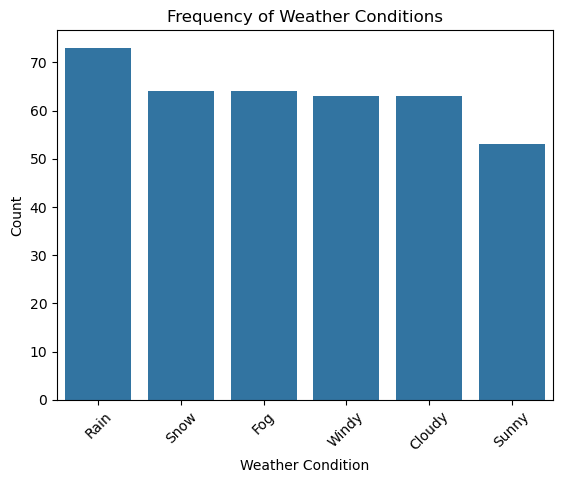

In [122]:
sns.countplot(data=df_weather, x='conditions', order=df_weather['conditions'].value_counts().index)
plt.title('Frequency of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


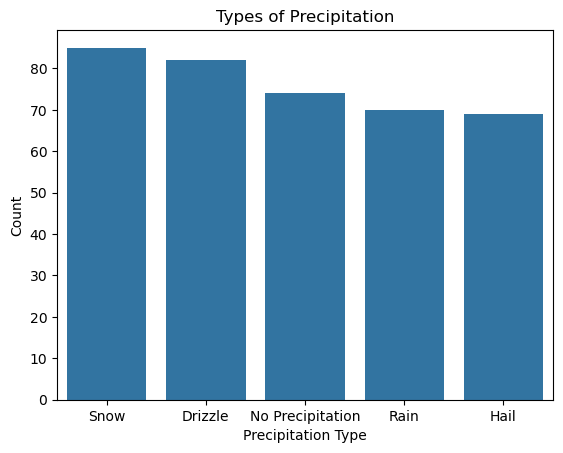

In [123]:
sns.countplot(data=df_weather[df_weather['precipitation'].notna()], x='precipitation', order=df_weather['precipitation'].value_counts().index)
plt.title('Types of Precipitation')
plt.xlabel('Precipitation Type')
plt.ylabel('Count')
plt.show()


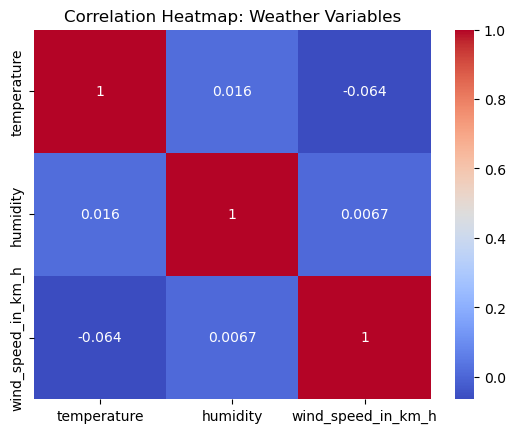

In [124]:
numeric_cols = ['temperature', 'humidity', 'wind_speed_in_km_h']
corr = df_weather[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Weather Variables')
plt.show()


Missing values in precipitation represent None or No precipitation

In [126]:
df_weather.to_csv('df_waether_cleaned.csv', index=False)